Generation 0
Generation 1
Generation 2
Generation 3
Generation 4
Generation 5
Generation 6
Generation 7
Generation 8
Generation 9
Best SMILES: 
QED score: 0.33942358984550913


[22:11:23] SMILES Parse Error: syntax error while parsing: CC()OCCO
[22:11:23] SMILES Parse Error: check for mistakes around position 4:
[22:11:23] CC()OCCO
[22:11:23] ~~~^
[22:11:23] SMILES Parse Error: Failed parsing SMILES 'CC()OCCO' for input: 'CC()OCCO'
[22:11:23] SMILES Parse Error: unclosed ring for input: 'CN=C1'
[22:11:23] SMILES Parse Error: unclosed ring for input: 'CCC=CCl1'
[22:11:23] SMILES Parse Error: unclosed ring for input: 'NC1'
[22:11:23] SMILES Parse Error: syntax error while parsing: CC()OC1
[22:11:23] SMILES Parse Error: check for mistakes around position 4:
[22:11:23] CC()OC1
[22:11:23] ~~~^
[22:11:23] SMILES Parse Error: Failed parsing SMILES 'CC()OC1' for input: 'CC()OC1'
[22:11:23] SMILES Parse Error: extra open parentheses while parsing: CClC(CCCC=CCl1
[22:11:23] SMILES Parse Error: check for mistakes around position 5:
[22:11:23] CClC(CCCC=CCl1
[22:11:23] ~~~~^
[22:11:23] SMILES Parse Error: Failed parsing SMILES 'CClC(CCCC=CCl1' for input: 'CClC(CCCC=CCl1'

Generation 0
Generation 1
Generation 2
Generation 3
Generation 4


[22:47:18] SMILES Parse Error: extra close parentheses while parsing: CCC)O
[22:47:18] SMILES Parse Error: check for mistakes around position 4:
[22:47:18] CCC)O
[22:47:18] ~~~^
[22:47:18] SMILES Parse Error: Failed parsing SMILES 'CCC)O' for input: 'CCC)O'
[22:47:18] SMILES Parse Error: unclosed ring for input: 'CCCC=C1'
[22:47:18] Explicit valence for atom # 1 F, 2, is greater than permitted


ValueError: empty range for randrange() (1, 1, 0)

Generated chromosome: [0, 1, 1, 0, 1, 0, 0, 0, 1, 0]
Fitness score of the chromosome: 4
Parent 1: [1, 0, 1, 1, 0], Parent 2: [0, 1, 0, 1, 1]
Child 1: [1, 1, 0, 1, 1], Child 2: [0, 0, 1, 1, 0]
Original chromosome: [1, 0, 1, 1, 0]
Mutated chromosome: [1, 0, 0, 1, 0]


In [ ]:
import random

# PARAMETERS
REFERENCE = "ATGGAGACCACCGTGAACCGGACCTTGAGGCATACTTCAAA"
DNA_BASES = ['A', 'T', 'G', 'C']
POPULATION_SIZE = 100
GENERATIONS = 1000
MUTATION_RATE = 0.01

# Function to generate a random DNA sequence
def generate_random_dna(length):
    return ''.join(random.choice(DNA_BASES) for _ in range(length))

# Fitness function: number of matching characters
def fitness(individual):
    return sum(1 for a, b in zip(individual, REFERENCE) if a == b)

# Crossover two parents
def crossover(parent1, parent2):
    point = random.randint(1, len(parent1) - 2)
    return parent1[:point] + parent2[point:]

# Mutate a DNA sequence
def mutate(sequence):
    return ''.join(
        base if random.random() > MUTATION_RATE else random.choice(DNA_BASES)
        for base in sequence
    )

# Generate initial population
population = [generate_random_dna(len(REFERENCE)) for _ in range(POPULATION_SIZE)]

# Run the genetic algorithm
for generation in range(GENERATIONS):
    population = sorted(population, key=fitness, reverse=True)
    best = population[0]
    print(f"Generation {generation}: Best Fitness = {fitness(best)} | Sequence: {best}")

    if best == REFERENCE:
        print("Perfect match found!")
        break

    # Selection: take top 20%
    selected = population[:POPULATION_SIZE // 5]

    # Reproduce and mutate to create new population
    next_generation = []
    while len(next_generation) < POPULATION_SIZE:
        parent1, parent2 = random.sample(selected, 2)
        child = crossover(parent1, parent2)
        child = mutate(child)
        next_generation.append(child)

    population = next_generation
##the mutation can be positive or negative 

Generation 0: Best Fitness = 17 | Sequence: TTCTGGAGAGCAGTACATTTTAACTTTCGTCTTACCTATGG
Generation 1: Best Fitness = 19 | Sequence: AGTGAAAGTAAGCTGCAGCCTAGCGTCCGGCCATTTGGAAA
Generation 2: Best Fitness = 20 | Sequence: CATGCAACCGCCCTGTACAGAACCTCAAGGCAGTGGAAGTT
Generation 3: Best Fitness = 24 | Sequence: CATGCAACCGCCCTGTACAGAACCTCAAGGCAATTTGGAAA
Generation 4: Best Fitness = 28 | Sequence: ATGAAGGCGACCAAGTACAGAACCTCAAGGCATCCTGGAAA
Generation 5: Best Fitness = 29 | Sequence: ATGCAGGCCGCCCTGTACAGAACCTCAAGGCATCCTGGAAA
Generation 6: Best Fitness = 29 | Sequence: ATGCAGGCCGCCCTGTACAGAACCTCAAGGCATCCTGGAAA
Generation 7: Best Fitness = 30 | Sequence: ATGGAGGCGACCCTGTACAGAACCTCAAGGCATCCTGGAAA
Generation 8: Best Fitness = 31 | Sequence: ATGGAGGCCGCCCTGTACAGAACCTCAAGGCATCCGTCAAA
Generation 9: Best Fitness = 32 | Sequence: ATGGAGGCCGCCCTGTACAGCACCTCAAGGCATCCTTCAAA
Generation 10: Best Fitness = 33 | Sequence: ATGGAGGCGACCCTGTACAGAACCTCAAGGCATACTTCAAA
Generation 11: Best Fitness = 33 | Sequence: ATGGAGGC

In [3]:
import random

# Load the full HBV genome (3,215 bp)
HBV_GENOME = (
    
    """AATTCCACAACCTTCCACCAAACTCTGCAAGATCCCAGAGTGAGAGGCCTGTATTTCCCTGCTGGTGGCT
CCAGTTCAGGAACAGTAAACCCTGTTCTGACTACTGCCTCTCCCTTATCGTCAATCTTCTCGAGGATTGG
GGACCCTGCGCTGAACATGGAGAACATCACATCAGGATTCCTAGGACCCCTTCTCGTGTTACAGGCGGGG
TTTTTCTTGTTGACAAGAATCCTCACAATACCGCAGAGTCTAGACTCGTGGTGGACTTCTCTCAATTTTC
TAGGGGGAACTACCGTGTGTCTTGGCCAAAATTCGCAGTCCCCAACCTCCAATCACTCACCAACCTCTTG
TCCTCCAACTTGTCCTGGTTATCGCTGGATGTGTCTGCGGCGTTTTATCATCTTCCTCTTCATCCTGCTG
CTATGCCTCATCTTCTTGTTGGTTCTTCTGGACTATCAAGGTATGTTGCCCGTTTGTCCTCTAATTCCAG
GATCCTCAACAACCAGCACGGGACCATGCCGGACCTGCATGACTACTGCTCAAGGAACCTCTATGTATCC
CTCCTGTTGCTGTACCAAACCTTCGGACGGAAATTGCACCTGTATTCCCATCCCATCATCCTGGGCTTTC
GGAAAATTCCTATGGGAGTGGGCCTCAGCCCGTTTCTCCTGGCTCAGTTTACTAGTGCCATTTGTTCAGT
GGTTCGTAGGGCTTTCCCCCACTGTTTGGCTTTCAGTTATATGGATGATGTGGTATTGGGGGCCAAGTCT
GTACAGCATCTTGAGTCCCTTTTTACCGCTGTTACCAATTTTCTTTTGTCTTTGGGTATACATTTAAACC
CTAACAAAACAAAGAGATGGGGTTACTCTCTAAATTTTATGGGTTATGTCATTGGATGTTATGGGTCCTT
GCCACAAGAACACATCATACAAAAAATCAAAGAATGTTTTAGAAAACTTCCTATTAACAGGCCTATTGAT
TGGAAAGTATGTCAACGAATTGTGGGTCTTTTGGGTTTTGCTGCCCCTTTTACACAATGTGGTTATCCTG
CGTTGATGCCTTTGTATGCATGTATTCAATCTAAGCAGGCTTTCACTTTCTCGCCAACTTACAAGGCCTT
TCTGTGTAAACAATACCTGAACCTTTACCCCGTTGCCCGGCAACGGCCAGGTCTGTGCCAAGTGTTTGCT
GACGCAACCCCCACTGGCTGGGGCTTGGTCATGGGCCATCAGCGCATGCGTGGAACCTTTTCGGCTCCTC
TGCCGATCCATACTGCGGAACTCCTAGCCGCTTGTTTTGCTCGCAGCAGGTCTGGAGCAAACATTATCGG
GACTGATAACTCTGTTGTCCTATCCCGCAAATATACATCGTTTCCATGGCTGCTAGGCTGTGCTGCCAAC
TGGATCCTGCGCGGGACGTCCTTTGTTTACGTCCCGTCGGCGCTGAATCCTGCGGACGACCCTTCTCGGG
GTCGCTTGGGACTCTCTCGTCCCCTTCTCCGTCTGCCGTTCCGACCGACCACGGGGCGCACCTCTCTTTA
CGCGGACTCCCCGTCTGTGCCTTCTCATCTGCCGGACCGTGTGCACTTCGCTTCACCTCTGCACGTCGCA
TGGAGACCACCGTGAACGCCCACCAAATATTGCCCAAGGTCTTACATAAGAGGACTCTTGGACTCTCAGC
AATGTCAACGACCGACCTTGAGGCATACTTCAAAGACTGTTTGTTTAAAGACTGGGAGGAGTTGGGGGAG
GAGATTAGGTTAAAGGTCTTTGTACTAGGAGGCTGTAGGCATAAATTGGTCTGCGCACCAGCACCATGCA
ACTTTTTCACCTCTGCCTAATCATCTCTTGTTCATGTCCTACTGTTCAAGCCTCCAAGCTGTGCCTTGGG
TGGCTTTGGGGCATGGACATCGACCCTTATAAAGAATTTGGAGCTACTGTGGAGTTACTCTCGTTTTTGC
CTTCTGACTTCTTTCCTTCAGTACGAGATCTTCTAGATACCGCCTCAGCTCTGTATCGGGAAGCCTTAGA
GTCTCCTGAGCATTGTTCACCTCACCATACTGCACTCAGGCAAGCAATTCTTTGCTGGGGGGAACTAATG
ACTCTAGCTACCTGGGTGGGTGTTAATTTGGAAGATCCAGCGTCTAGAGACCTAGTAGTCAGTTATGTCA
ACACTAATATGGGCCTAAAGTTCAGGCAACTCTTGTGGTTTCACATTTCTTGTCTCACTTTTGGAAGAGA
AACAGTTATAGAGTATTTGGTGTCTTTCGGAGTGTGGATTCGCACTCCTCCAGCTTATAGACCACCAAAT
GCCCCTATCCTATCAACACTTCCGGAGACTACTGTTGTTAGACGACGAGGCAGGTCCCCTAGAAGAAGAA
CTCCCTCGCCTCGCAGACGAAGGTCTCAATCGCCGCGTCGCAGAAGATCTCAATCTCGGGAATCTCAATG
TTAGTATTCCTTGGACTCATAAGGTGGGGAACTTTACTGGGCTTTATTCTTCTACTGTACCTGTCTTTAA
TCCTCATTGGAAAACACCATCTTTTCCTAATATACATTTACACCAAGACATTATCAAAAAATGTGAACAG
TTTGTAGGCCCACTCACAGTTAATGAGAAAAGAAGATTGCAATTGATTATGCCTGCCAGGTTTTATCCAA
AGGTTACCAAATATTTACCATTGGATAAGGGTATTAAACCTTATTATCCAGAACATCTAGTTAATCATTA
CTTCCAAACTAGACACTATTTACACACTCTATGGAAGGCGGGTATATTATATAAGAGAGAAACAACACAT
AGCGCCTCATTTTGTGGGTCACCATATTCTTGGGAACAAGATCTACAGCATGGGGCAGAATCTTTCCACC
AGCAATCCTCTGGGATTCTTTCCCGACCACCAGTTGGATCCAGCCTTCAGAGCAAACACCGCAAATCCAG
ATTGGGACTTCAATCCCAACAAGGACACCTGGCCAGACGCCAACAAGGTAGGAGCTGGAGCATTCGGGCT
GGGTTTCACCCCACCGCACGGAGGCCTTTTGGGGTGGAGCCCTCAGGCTCAGGGCATACTACAAACTTTG
CCAGCAAATCCGCCTCCTGCCTCCACCAATCGCCAGTCAGGAAGGCAGCCTACCCCGCTGTCTCCACCTT
TGAGAAACACTCATCCTCAGGCCATGCAGTGG

"""
    # Truncated here for readability – paste the full 3,215 bp sequence as a string
)

DNA_BASES = ['A', 'T', 'G', 'C']
POPULATION_SIZE = 50  # Reduce if running on a limited machine
GENERATIONS = 500     # Increase if needed
MUTATION_RATE = 0.001  # Lower rate to maintain stability

best_fitness_per_generation = []  # Track best fitness per generation
# Function to generate random DNA sequence
def generate_random_dna(length):
    return ''.join(random.choice(DNA_BASES) for _ in range(length))

# Fitness: count matching base pairs
def fitness(individual):
    return sum(1 for a, b in zip(individual, HBV_GENOME) if a == b)

# Crossover function
def crossover(parent1, parent2):
    point = random.randint(1, len(parent1) - 2)
    return parent1[:point] + parent2[point:]

# Mutation function
def mutate(sequence):
    return ''.join(
        base if random.random() > MUTATION_RATE else random.choice(DNA_BASES)
        for base in sequence
    )

# Initial population
population = [generate_random_dna(len(HBV_GENOME)) for _ in range(POPULATION_SIZE)]

# Run GA
for generation in range(GENERATIONS):
    population = sorted(population, key=fitness, reverse=True)
    best = population[0]
    best_fit = fitness(best)
    best_fitness_per_generation.append(best_fit)  # Track best fitness
    print(f"Generation {generation} | Best Match: {best_fit}/{len(HBV_GENOME)}")

    if best_fit == len(HBV_GENOME):
        print("Perfect genome match found!")
        break

    # Select top 20%
    selected = population[:POPULATION_SIZE // 5]

    # Reproduce and mutate
    next_generation = []
    while len(next_generation) < POPULATION_SIZE:
        parent1, parent2 = random.sample(selected, 2)
        child = crossover(parent1, parent2)
        child = mutate(child)
        next_generation.append(child)

    population = next_generation


Generation 0 | Best Match: 872/3229
Generation 1 | Best Match: 870/3229
Generation 2 | Best Match: 885/3229
Generation 3 | Best Match: 894/3229
Generation 4 | Best Match: 906/3229
Generation 5 | Best Match: 924/3229
Generation 6 | Best Match: 926/3229
Generation 7 | Best Match: 931/3229
Generation 8 | Best Match: 933/3229
Generation 9 | Best Match: 935/3229
Generation 10 | Best Match: 938/3229
Generation 5 | Best Match: 924/3229
Generation 6 | Best Match: 926/3229
Generation 7 | Best Match: 931/3229
Generation 8 | Best Match: 933/3229
Generation 9 | Best Match: 935/3229
Generation 10 | Best Match: 938/3229
Generation 11 | Best Match: 942/3229
Generation 12 | Best Match: 944/3229
Generation 13 | Best Match: 948/3229
Generation 14 | Best Match: 951/3229
Generation 15 | Best Match: 953/3229
Generation 16 | Best Match: 956/3229
Generation 11 | Best Match: 942/3229
Generation 12 | Best Match: 944/3229
Generation 13 | Best Match: 948/3229
Generation 14 | Best Match: 951/3229
Generation 15 | 

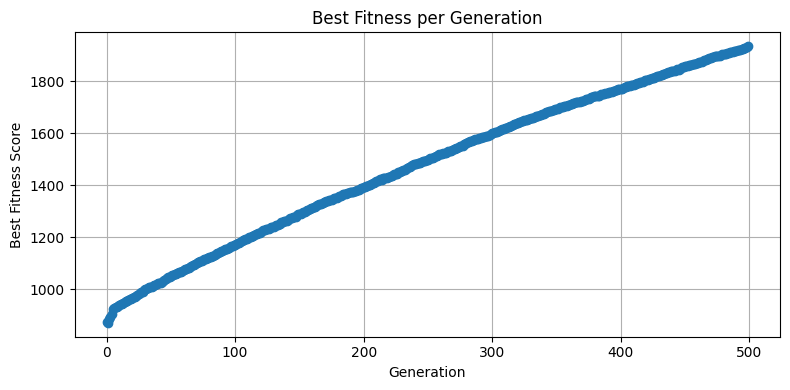

In [4]:
import matplotlib.pyplot as plt

# Example: If you have a list called best_fitness_per_generation
# Replace this with your actual list if named differently
# best_fitness_per_generation = [...]

plt.figure(figsize=(8, 4))
plt.plot(best_fitness_per_generation, marker='o')
plt.title("Best Fitness per Generation")
plt.xlabel("Generation")
plt.ylabel("Best Fitness Score")
plt.grid(True)
plt.tight_layout()
plt.show()

MAIVMGR


3-letter code: MetAlaIleValMetGlyArg
Molecular Weight: 777.0108 Da
Isoelectric Point (pI): 9.500077247619632


Aliphatic Index: 111.42857142857143


3-letter code: MetAlaIleValMetGlyArg
Molecular Weight: 777.0108 Da
Isoelectric Point (pI): 9.500077247619632
Instability Index: 14.071428571428571
Hydropathy (GRAVY): 1.3428571428571427
Aliphatic Index: 111.42857142857143


Genome length: 3182 bp

Gene: P
Product: polymerase
Protein sequence (first 60 aa): MPLSYQHFRRLLLLDDEAGPLEEELPRLADEGLNRRVAEDLNLGNLNVSIPWTHKVGNFT...

Gene: S
Product: large envelope protein
Protein sequence (first 60 aa): MGQNLSTSNPLGFFPDHQLDPAFRANTANPDWDFNPNKDTWPDANKVGAGAFGLGFTPPH...

Gene: S
Product: middle envelope protein
Protein sequence (first 60 aa): MQWNSTTFHQTLQDPRVRGLYFPAGGSSSGTVNPVLTTASPLSSIFSRIGDPALNMENIT...

Gene: S
Product: small envelope protein
Protein sequence (first 60 aa): MENITSGFLGPLLVLQAGFFLLTRILTIPQSLDSWWTSLNFLGGTTVCLGQNSQSPTSNH...

Gene: X
Product: X protein
Protein sequence (first 60 aa): MAARLCCQLDPARDVLCLRPVGAESCGRPFSGSLGTLSSPSPSAVPTDHGAHLSLRGLPV...

Gene: C
Product: pre-capsid protein
Protein sequence (first 60 aa): MQLFHLCLIISCSCPTVQASKLCLGWLWGMDIDPYKEFGATVELLSFLPSDFFPSVRDLL...

Gene: C
Product: capsid protein
Protein sequence (first 60 aa): MDIDPYKEFGATVELLSFLPSDFFPSVRDLLDTASALYREALESPEHCSPHHTALRQAIL...


Saved protein sequences to hbv_proteins.fasta


In [6]:
pip install matplotlib 

  Using cached matplotlib-3.10.3-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/108.2 kB ? eta -:--:--
     --- ------------------------------------ 10.2/108.2 kB ? eta -:--:--
     --- ------------------------------------ 10.2/108.2 kB ? eta -:--:--
     --- ------------------------------------ 10.2/108.2 kB ? eta -:--:--
     -------------- ---------------------- 41.0/108.2 kB 217.9 kB/s eta 0:00:01
     -------------- ---------------------- 41.0/108.2 kB 217.9 kB/s eta 0:00:01
     ---------------------------------- - 102.4/108.2 kB 392.2 kB/s eta 0:00:01
     ------------------------------------ 108.2/108.2 kB 368.4 kB/s eta 0:00:00
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[✓] Extracted Polymerase Gene
Protein sequence (first 60 aa):
MPLSYQHFRRLLLLDDEAGPLEEELPRLADEGLNRRVAEDLNLGNLNVSIPWTHKVGNFT...

[🔍] Checking for resistance mutations...
✅ Position 181: H (No resistance)
✅ Position 204: Q (No resistance)

[🖼] Visualization saved as hbv_polymerase_map.png


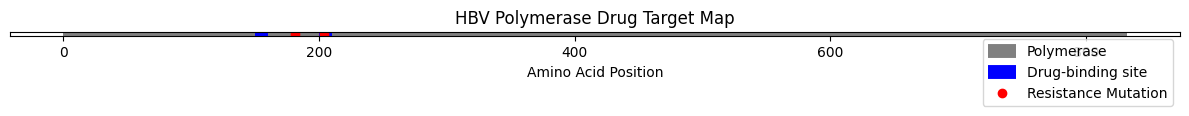